In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
balt = pd.read_csv("../data/processed/processed.csv")
balt = balt.dropna()
balt.head(10)

,...1,callDate,priority,district,description,callNumber,incidentLocation,Lat,Long,timeOfDay
0,11,2015-07-13,Non-Emergency,CD,FOLLOWUP,P151941014,1500 PENNSYLVANIA AV,39.302243,-76.633075,10.866667
1,16,2015-07-13,Medium,SE,DISORDERLY,P151941020,3300 E FAYETTE ST,39.295066,-76.570896,10.900000
2,17,2015-07-13,Low,SE,INVESTIGATE,P151941021,3300 E FAYETTE ST,39.295066,-76.570896,10.883333
3,20,2015-07-13,Low,NE,OTHER,P151941024,1600 STONEWOOD RD,39.348760,-76.587609,10.900000
4,22,2015-07-13,Medium,WD,BURGLARY,P151941026,1600 BRUCE CT,39.306700,-76.645785,10.900000
5,26,2015-07-13,Medium,ND,BURGLARY,P151941030,3500 CHESTNUT AV,39.330030,-76.629608,10.916667
6,36,2015-07-13,Non-Emergency,ND,FOLLOWUP,P151941041,1000 W 38TH ST,39.334313,-76.633419,9.550000
7,41,2015-07-13,Low,WD,OTHER,P151941046,1700 W LEXINGTON ST,39.290864,-76.644126,10.983333
8,42,2015-07-13,Low,SW,INVEST,P151941047,N FRANKLINTOWN RD/EDMONDSON AV,39.294468,-76.663321,10.933333
9,43,2015-07-13,Medium,SE,DISORDERLY,P151941048,3300 E FAYETTE ST,39.295066,-76.570896,10.950000


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
balt["n_priority"] = le.fit_transform(balt.priority)
balt["n_description"] = le.fit_transform(balt.description)
balt.head()

,...1,callDate,priority,district,description,callNumber,incidentLocation,Lat,Long,timeOfDay,n_priority,n_description
0,11,2015-07-13,Non-Emergency,CD,FOLLOWUP,P151941014,1500 PENNSYLVANIA AV,39.302243,-76.633075,10.866667,4,154
1,16,2015-07-13,Medium,SE,DISORDERLY,P151941020,3300 E FAYETTE ST,39.295066,-76.570896,10.900000,3,98
2,17,2015-07-13,Low,SE,INVESTIGATE,P151941021,3300 E FAYETTE ST,39.295066,-76.570896,10.883333,2,205
3,20,2015-07-13,Low,NE,OTHER,P151941024,1600 STONEWOOD RD,39.348760,-76.587609,10.900000,2,266
4,22,2015-07-13,Medium,WD,BURGLARY,P151941026,1600 BRUCE CT,39.306700,-76.645785,10.900000,3,54


In [4]:
from sklearn.model_selection import train_test_split
X = balt[["n_description", "timeOfDay"]]
y = balt["n_priority"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

C:\Users\Kevin\Desktop\Socian\DSU-Client-Socian-Project\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy: 91.166%


C:\Users\Kevin\Desktop\Socian\DSU-Client-Socian-Project\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Kevin\Desktop\Socian\DSU-Client-Socian-Project\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


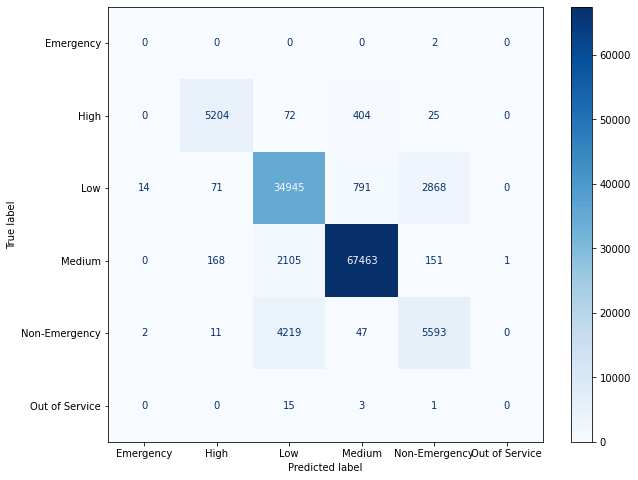

In [6]:
from sklearn.metrics import plot_confusion_matrix
labels = np.array(['Emergency', 'High', 'Low', 'Medium', 'Non-Emergency', 'Out of Service'])
print(f"Accuracy: {neigh.score(X_test, y_test) * 100:.3f}%")
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(neigh, X_test, y_test, display_labels = labels, ax = ax, cmap = plt.cm.Blues)
plt.show()